# Quora Insincere Questions Classification

![](https://cdn-images-1.medium.com/max/1600/1*GEQNBwOoFRS2zcaw2P6_wg.jpeg)

In [1]:
import numpy as np 
import pandas as pd 

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import nltk
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from string import punctuation 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
df_train = pd.read_csv("train.csv")

In [5]:
df_train.shape

(1306122, 3)

In [6]:
df_train.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [7]:
df_test = pd.read_csv("test.csv")

In [8]:
df_test.shape

(375806, 2)

In [9]:
df_test.head()

,qid,question_text
0,0000163e3ea7c7a74cd7,Why do so many women become so rude and arroga...
1,00002bd4fb5d505b9161,When should I apply for RV college of engineer...
2,00007756b4a147d2b0b3,What is it really like to be a nurse practitio...
3,000086e4b7e1c7146103,Who are entrepreneurs?
4,0000c4c3fbe8785a3090,Is education really making good people nowadays?


In [10]:
df_train["target"].value_counts()

0    1225312
1      80810
Name: target, dtype: int64

## Exploratory Data Analysis

In [11]:
insincere = df_train[df_train["target"] == 1]
sincere = df_train[df_train["target"] == 0]

In [12]:
sincere.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


In [13]:
insincere.head()

,qid,question_text,target
22,0000e91571b60c2fb487,Has the United States become the largest dicta...,1
30,00013ceca3f624b09f42,Which babies are more sweeter to their parents...,1
110,0004a7fcb2bf73076489,If blacks support school choice and mandatory ...,1
114,00052793eaa287aff1e1,I am gay boy and I love my cousin (boy). He is...,1
115,000537213b01fd77b58a,Which races have the smallest penis?,1


### Distribution of Sincere / Insincere questions

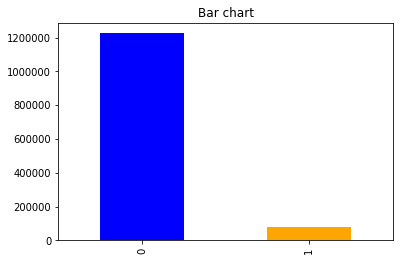

In [14]:
question_class = df_train["target"].value_counts()
question_class.plot(kind= "bar", color= ["blue", "orange"])
plt.title("Bar chart")
plt.show()

In [15]:
print(df_train["target"].value_counts())
print(sum(df_train["target"] == 1) / sum(df_train["target"] == 0) * 100, "percent of questions are insincere.")
print(100 - sum(df_train["target"] == 1) / sum(df_train["target"] == 0) * 100, "percent of questions are sincere")

0    1225312
1      80810
Name: target, dtype: int64
6.595054973753624 percent of questions are insincere.
93.40494502624638 percent of questions are sincere


**We have a Unbalenced Data**

### Insincere Word cloud

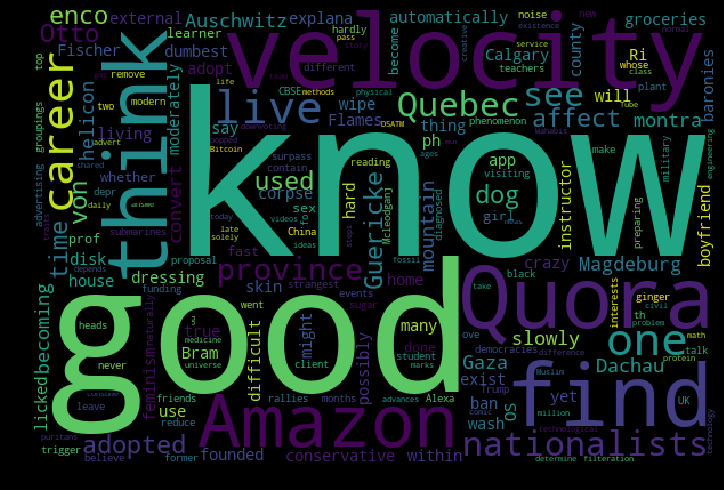

In [17]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Generate a word cloud image
sincere_wordcloud = WordCloud(width=600, height=400).generate(str(sincere["question_text"]))
#Positive Word cloud
plt.figure(figsize=(10,8), facecolor="black")
plt.imshow(sincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

### Insincere Word cloud

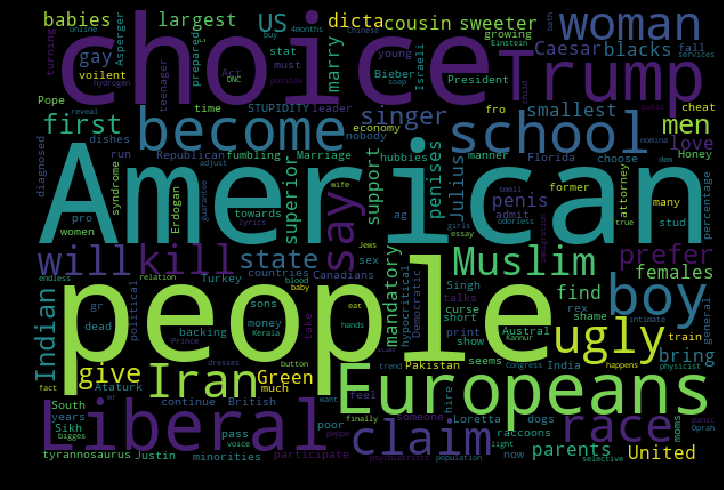

In [18]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

# Generate a word cloud image
insincere_wordcloud = WordCloud(width=600, height=400).generate(str(insincere["question_text"]))
#Positive Word cloud
plt.figure(figsize=(10,8), facecolor="black")
plt.imshow(insincere_wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show();

## Feature Engineering

### Number of words in the text

In [27]:
df_train["number_words"] = df_train["question_text"].apply(lambda x: len(x.split()))
df_test["number_words"] = df_test["question_text"].apply(lambda x: len(x.split()))

### Number of unique words in the text

In [28]:
df_train["num_unique_words"] = df_train["question_text"].apply(lambda x: len(set(str(x).split())))
df_test["num_unique_words"] = df_test["question_text"].apply(lambda x: len(set(str(x).split())))

### Number of characters in the text

In [29]:
df_train["num_chars"] = df_train["question_text"].apply(lambda x: len(str(x)))
df_test["num_chars"] = df_test["question_text"].apply(lambda x: len(str(x)))

### Number of Stopwords in text

In [30]:
from nltk.corpus import stopwords 
stop_words = set(stopwords.words("english"))

In [31]:
df_train["num_stopwords"] = df_train["question_text"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))
df_test["num_stopwords"] = df_test["question_text"].apply(lambda x : len([nw for nw in str(x).split() if nw.lower() in stop_words]))

### Number of punctuations in text

In [32]:
df_train["num_punctuation"] = df_train["question_text"].apply(lambda x : len([np for np in str(x) if np in punctuation]))
df_test["num_punctuation"] = df_test["question_text"].apply(lambda x : len([np for np in str(x) if np in punctuation]))

### Number of Upper case and Lower case in text

In [34]:
df_train["num_uppercase"] = df_train["question_text"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))
df_test["num_uppercase"] = df_test["question_text"].apply(lambda x : len([nu for nu in str(x).split() if nu.isupper()]))

In [35]:
df_train["num_lowercase"] = df_train["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))
df_test["num_lowercase"] = df_test["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.islower()]))

### Number of title in text

In [36]:
df_train["num_title"] = df_train["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.istitle()]))
df_test["num_title"] = df_test["question_text"].apply(lambda x : len([nl for nl in str(x).split() if nl.istitle()]))

In [37]:
df_train[df_train["target"] == 1].describe()

,target,number_words,num_unique_words,num_chars,num_stopwords,num_punctuation,num_uppercase,num_lowercase,num_title
count,80810.0,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000,80810.000000
mean,1.0,17.277812,16.037594,98.064163,8.000829,2.369905,0.326284,13.919453,2.962826
std,0.0,9.568309,8.153619,55.186227,4.918845,2.906119,0.896822,8.661324,1.971440
min,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,10.000000,10.000000,55.000000,4.000000,1.000000,0.000000,7.000000,2.000000
50%,1.0,15.000000,14.000000,86.000000,7.000000,2.000000,0.000000,12.000000,3.000000
75%,1.0,23.000000,21.000000,130.000000,11.000000,3.000000,0.000000,19.000000,4.000000
max,1.0,64.000000,48.000000,1017.000000,37.000000,411.000000,37.000000,56.000000,37.000000


In [38]:
df_train[df_train["target"] == 0].describe()

,target,number_words,num_unique_words,num_chars,num_stopwords,num_punctuation,num_uppercase,num_lowercase,num_title
count,1225312.0,1.225312e+06,1.225312e+06,1.225312e+06,1.225312e+06,1.225312e+06,1.225312e+06,1.225312e+06,1.225312e+06
mean,0.0,1.250853e+01,1.187845e+01,6.887276e+01,6.040031e+00,1.705378e+00,4.588595e-01,1.003000e+01,2.065596e+00
std,0.0,6.750694e+00,5.782985e+00,3.674032e+01,3.616010e+00,1.547848e+00,8.451253e-01,6.169070e+00,1.441385e+00
min,0.0,2.000000e+00,2.000000e+00,5.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.0,8.000000e+00,8.000000e+00,4.400000e+01,4.000000e+00,1.000000e+00,0.000000e+00,6.000000e+00,1.000000e+00
50%,0.0,1.100000e+01,1.000000e+01,5.900000e+01,5.000000e+00,1.000000e+00,0.000000e+00,8.000000e+00,2.000000e+00
75%,0.0,1.500000e+01,1.400000e+01,8.300000e+01,7.000000e+00,2.000000e+00,1.000000e+00,1.200000e+01,3.000000e+00
max,0.0,1.340000e+02,9.600000e+01,7.520000e+02,5.600000e+01,1.580000e+02,2.500000e+01,1.120000e+02,2.900000e+01


### Box plot of number of words according to the target

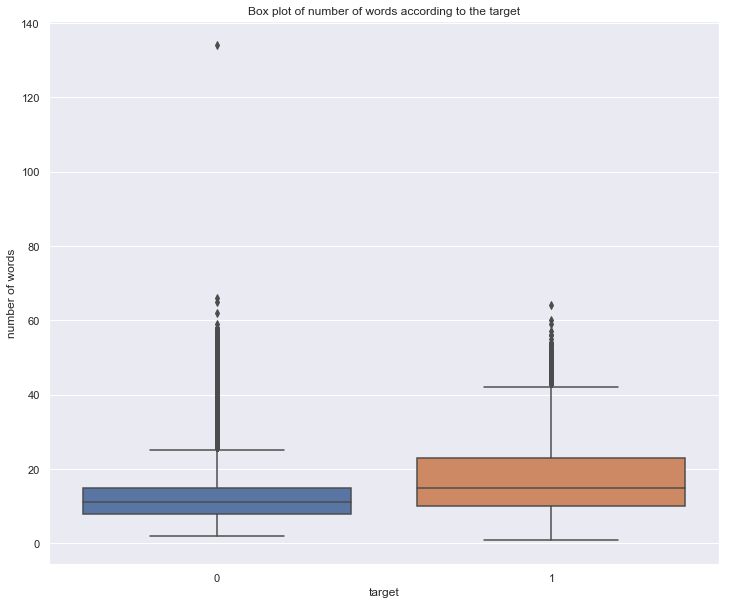

In [39]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train, y="number_words", x="target",orient="v")
ax.set(xlabel="target", ylabel="number of words", title="Box plot of number of words according to the target");

### Box plot of number of unique words according to the target

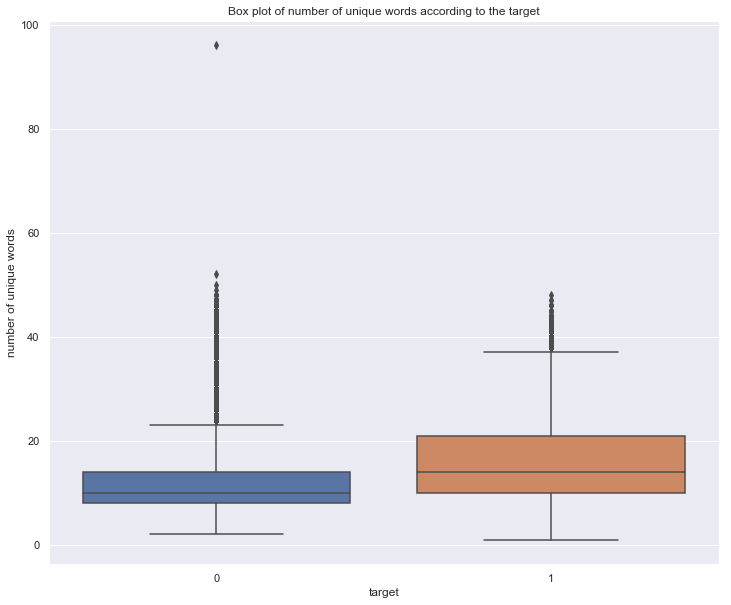

In [40]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train, y="num_unique_words", x="target",orient="v")
ax.set(xlabel="target", ylabel="number of unique words", title="Box plot of number of unique words according to the target");

### Box plot of number of characters according to the target

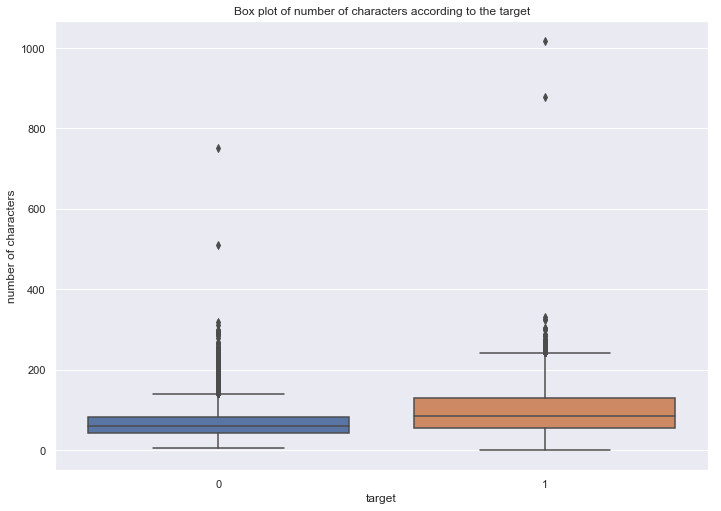

In [41]:
ig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train, y="num_chars", x="target",orient="v")
ax.set(xlabel="target", ylabel="number of characters", title="Box plot of number of characters according to the target");

### Box plot of number of stopwords according to the target

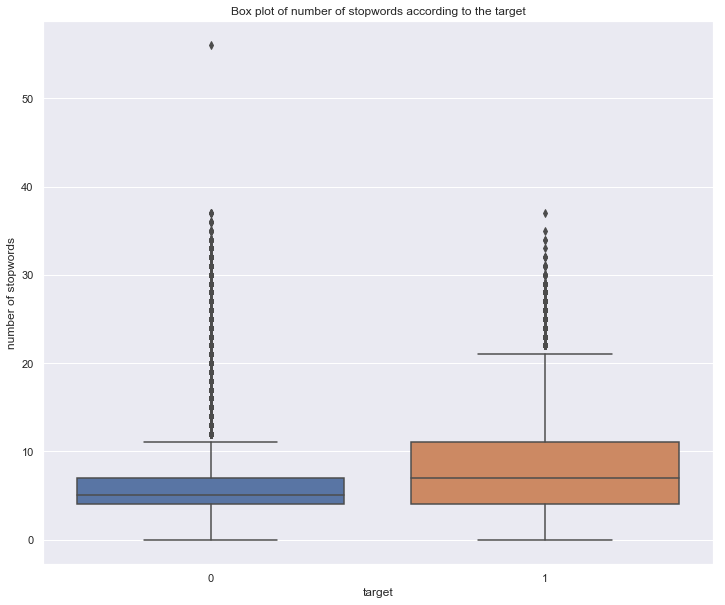

In [42]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train, y="num_stopwords", x="target",orient="v")
ax.set(xlabel="target", ylabel="number of stopwords", title="Box plot of number of stopwords according to the target");

### Box plot of number of lowercases according to the target

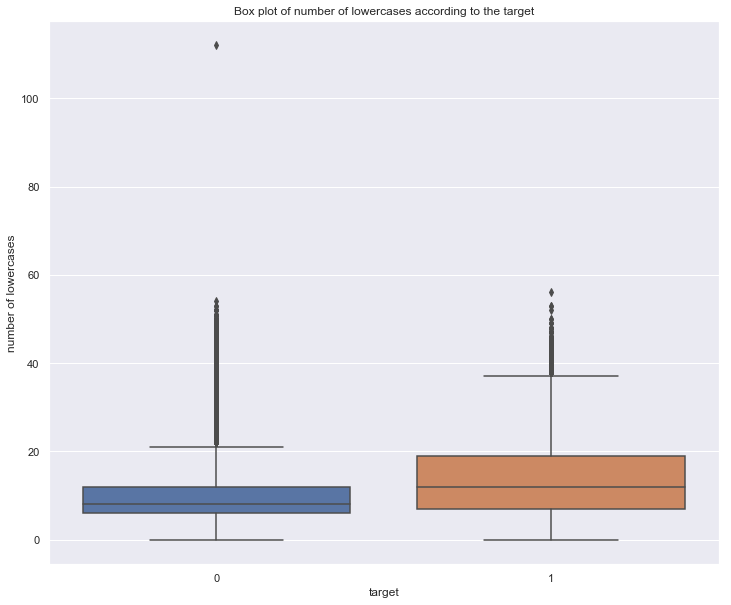

In [43]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train, y="num_lowercase", x="target",orient="v")
ax.set(xlabel="target", ylabel="number of lowercases", title="Box plot of number of lowercases according to the target");

### Box plot of number of titles according to the target

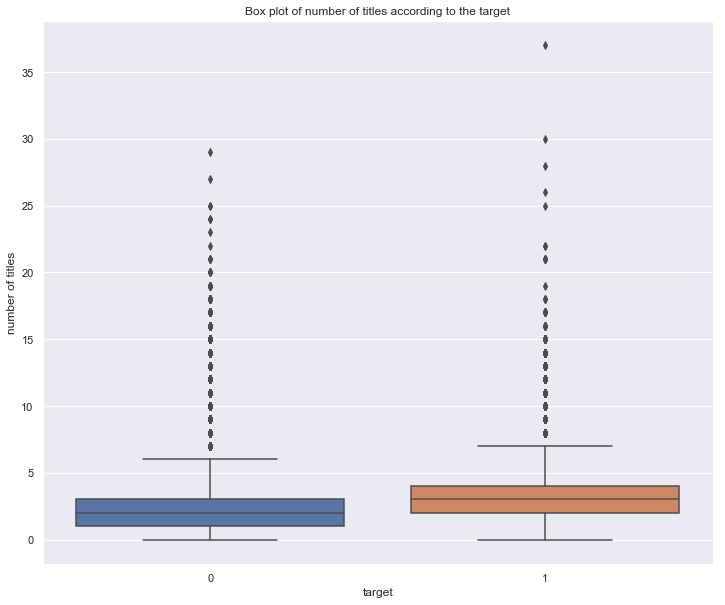

In [44]:
fig, ax = plt.subplots()
fig.set_size_inches(12, 10)
sns.boxplot(data=df_train, y="num_title", x="target",orient="v")
ax.set(xlabel="target", ylabel="number of titles", title="Box plot of number of titles according to the target");

## Remove Stopwords and Punctuation

In [35]:
def text_process(question):
    nopunc = [char for char in question if char not in punctuation]
    nopunc = "".join(nopunc)
    meaning = [word for word in nopunc.split() if word.lower() not in stopwords.words("english")]
    return( " ".join( meaning ))

In [48]:
clean_train = df_train["question_text"].apply(text_process)

In [49]:
clean_train.head()

0        Quebec nationalists see province nation 1960s
1        adopted dog would encourage people adopt shop
2    velocity affect time velocity affect space geo...
3         Otto von Guericke used Magdeburg hemispheres
4    convert montra helicon mountain bike changing ...
Name: question_text, dtype: object

In [36]:
clean_test = df_test["question_text"].apply(text_process)

In [37]:
clean_test.head()

0    many women become rude arrogant get little bit...
1    apply RV college engineering BMS college engin...
2                       really like nurse practitioner
3                                        entrepreneurs
4         education really making good people nowadays
Name: question_text, dtype: object

In [52]:
import pickle

with open("clean_train.pkl", 'wb') as f:
    pickle.dump(clean_train, f, protocol=pickle.HIGHEST_PROTOCOL)

In [38]:
with open("clean_test.pkl", 'wb') as f:
    pickle.dump(clean_test, f, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
import pickle
with open("clean_train.pkl", 'rb') as f:
    clean_train = pickle.load(f)

In [39]:
with open("clean_test.pkl", 'rb') as f:
    clean_test = pickle.load(f)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_val, y_train, y_val = train_test_split(clean_train, df_train.target.values, test_size=0.2, stratify = df_train.target.values)

In [20]:
X_train.shape, X_val.shape

((1044897,), (261225,))

In [21]:
y_train.shape, y_val.shape

((1044897,), (261225,))

## Model Building

In [22]:
pipeline = Pipeline([("cv",CountVectorizer(analyzer="word",ngram_range=(1,4),max_df=0.9)),
                     ("clf",LogisticRegression(solver="saga", class_weight="balanced", C=0.45, max_iter=250, verbose=1))])

In [23]:
X_train, X_val, y_train, y_val = train_test_split(clean_train, df_train.target.values, test_size=0.1, stratify = df_train.target.values)

In [24]:
lr_model = pipeline.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


max_iter reached after 659 seconds


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed: 11.1min finished


In [25]:
lr_model

Pipeline(memory=None,
     steps=[('cv', CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=0.9, max_features=None, min_df=1,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_a...penalty='l2', random_state=None,
          solver='saga', tol=0.0001, verbose=1, warm_start=False))])

In [27]:
y_pred = lr_model.predict(X_val)

## Evaluating Results

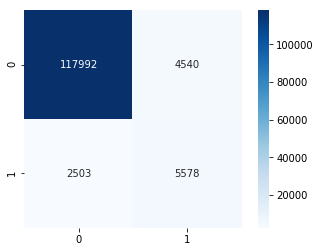

In [28]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, cmap="Blues", annot=True, square=True, fmt=".0f");

In [29]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97    122532
           1       0.55      0.69      0.61      8081

   micro avg       0.95      0.95      0.95    130613
   macro avg       0.77      0.83      0.79    130613
weighted avg       0.95      0.95      0.95    130613



In [40]:
y_pred_final = pipeline.predict(clean_test)
y_pred_final

array([1, 0, 0, ..., 0, 0, 0])

## Formatting Final Results

In [43]:
df_sub = pd.DataFrame({"qid":df_test["qid"], "prediction":y_pred_final})
df_sub.head()

,qid,prediction
0,0000163e3ea7c7a74cd7,1
1,00002bd4fb5d505b9161,0
2,00007756b4a147d2b0b3,0
3,000086e4b7e1c7146103,0
4,0000c4c3fbe8785a3090,0


In [44]:
df_sub.to_csv('submission.csv', index=False)

**The submission have test score of 0.61**